### DataSource function (yfinance)

In [19]:
# Libraries

import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import gridspec

### Function for getting price data

In [20]:


#syntax for price data 
#price_data = yf.Ticker(ticker = "_ticker", period = )
def get_ticker_candle_df(_ticker,_interval,_startdate,_enddate):
    dp_fetch = yf.Ticker(_ticker)
    tick_hist_df = dp_fetch.history(start=_startdate,end=_enddate,interval=_interval)
    #print(futu1m)
    tick_hist_candle_df = tick_hist_df.iloc[:,0:5]
    return tick_hist_candle_df


"Candlestick data"
#futu_candle = get_ticker_candle_df("FUTU","1m","2021-11-24","2021-12-01")
#futu_close_1m_close = get_ticker_candle_df("FUTU","1m","2021-11-24","2021-12-01").Close


'Candlestick data'

Syntax:
    - `yf.finance(ticker, period, interval, start, end, prepost, auto_adjust, actions)`

- period: data period to download (either use period parameter or use start and end) Valid periods are:
    - “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max” 
- Interval: data interval (1m data is only for available for last 7 days, and data interval <1d for the last 60 days) Valid intervals are:
    - “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
- start: period start
- end: period end
- prepost: includes pre-and-post market data in result?
- auto_adjust: default = true, adjust all OHLC? just leave it true
- actions: default = true, download stock dividends and stock splits events

### Readings of technical indicators

In [21]:
"Dinapoli MACD"

def bear_macd(_src,  sc,  lc,  sp ):
    import pandas as pd
    fs = [0]      
    ss = [0]  #have to define the first data here because the following formula need to refer to prior value.
    s = [0]
    r = [0]
    for i in range(len(_src)):
        #range: total number of item in the list: len(_src)
        fs.append(fs[-1] + 2.0 / (1.0+sc) * (_src[i] - fs[-1])) #
        ss.append(ss[-1] + 2.0 / (1.0+lc) * (_src[i] - ss[-1]))
    fs_series = pd.Series(index=_src.index, data = fs[1:])
    ss_series = pd.Series(index=_src.index, data = ss[1:])
    r = fs_series - ss_series
    for i in range(len(_src)):
        s.append(s[-1] + 2.0/(1+sp)*(r[i]-s[-1]))
        
    s_series = pd.Series(index=_src.index, data=s[1:])
    
    return [r, s_series]


### strategy signals

In [22]:
#buy / sell signal:


#def MACD_trading_Sig(_macd,)
#    import pandas as pd
#    sig =[]
#    stock = 0
    #for i in range(len(_osc_src)):

### Dataframes (price data, indicator values)

In [36]:
#Calculating date ('1m' max 7 days range from yahoo finance)
from datetime import date
from datetime import timedelta

today = date.today()
print("today: "+str(today))
print(type(str(today)))

lastweek = today - timedelta(days=7)
print("lastweek: "+str(lastweek))
print(type(str(lastweek)))



#Data feeding parameters
_ticker = "DKS"
_resolution = "1m"
_Start_date =lastweek
_End_date = today

#candlestick (price data)
candle_data  =  get_ticker_candle_df(_ticker,_resolution,_Start_date,_End_date)
df = candle_data.reset_index()
print(df)

#macd parameters to be optimized
_MACD_MTF_resolution1 = '1m'
_MACD_MTF_resolution2 = '15m'
_SC = 8.3896
_LC = 17.5185
_SP = 9.05



# get_ticker_candle_df() allows us define timeframe
[macd_1m,signal_1m] =  bear_macd(get_ticker_candle_df(_ticker,_MACD_MTF_resolution1,_Start_date,_End_date).Close,_SC,_LC,_SP)
[macd_15m,signal_15m] =  bear_macd(get_ticker_candle_df(_ticker,_MACD_MTF_resolution2,_Start_date,_End_date).Close,_SC,_LC,_SP)
m1 = macd_1m
m15 = macd_15m
s1 = signal_1m
s15 = signal_15m



"Multiple timeframe"
data = pd.DataFrame()
data['macd1m']= m1
data['macd15m']= m15
data['macd15m']=data['macd15m'].interpolate(method='linear') 
data['signal1m']= s1
data['signal15m']= s15
data['signal15m']=data['signal15m'].interpolate(method='linear') 
data=data.reset_index() 


#print MACD value
print("===============MACD value===============")
print(data)



#EMA
import talib

#EMA parameters
_EMA_MTF_resolution1 = '1m'
_EMA_MTF_resolution2 = '15m'
_EMA_Length_1m = 8
_EMA_Length_15m = 12

ema1m = talib.EMA(get_ticker_candle_df(_ticker,_EMA_MTF_resolution1,_Start_date,_End_date).Close,_EMA_Length_1m)
ema15m = talib.EMA(get_ticker_candle_df(_ticker,_EMA_MTF_resolution2,_Start_date,_End_date).Close,_EMA_Length_15m)
data2 = pd.DataFrame()
data2['ema1m']= ema1m
data2['ema15m']= ema15m
data2['ema15m']=data2['ema15m'].interpolate(method='linear') 
data2=data2.reset_index() 
print("===============EMA value===============")
print(data2)



today: 2021-12-09
<class 'str'>
lastweek: 2021-12-02
<class 'str'>
                      Datetime        Open        High         Low  \
0    2021-12-01 11:00:00-05:00  119.050003  119.250000  118.970001   
1    2021-12-01 11:01:00-05:00  119.044998  119.139999  118.910004   
2    2021-12-01 11:02:00-05:00  119.070000  119.250000  119.040001   
3    2021-12-01 11:03:00-05:00  119.129997  119.155998  118.970001   
4    2021-12-01 11:04:00-05:00  119.065002  119.139999  118.989998   
...                        ...         ...         ...         ...   
1930 2021-12-08 10:55:00-05:00  110.336998  110.352303  110.205002   
1931 2021-12-08 10:56:00-05:00  110.180000  110.190002  110.160004   
1932 2021-12-08 10:57:00-05:00  110.040001  110.239998  110.040001   
1933 2021-12-08 10:58:00-05:00  110.099998  110.239998  110.099998   
1934 2021-12-08 10:59:00-05:00  110.209999  110.209999  110.019997   

           Close  Volume  
0     119.029999       0  
1     119.129997    4051  
2     119.0

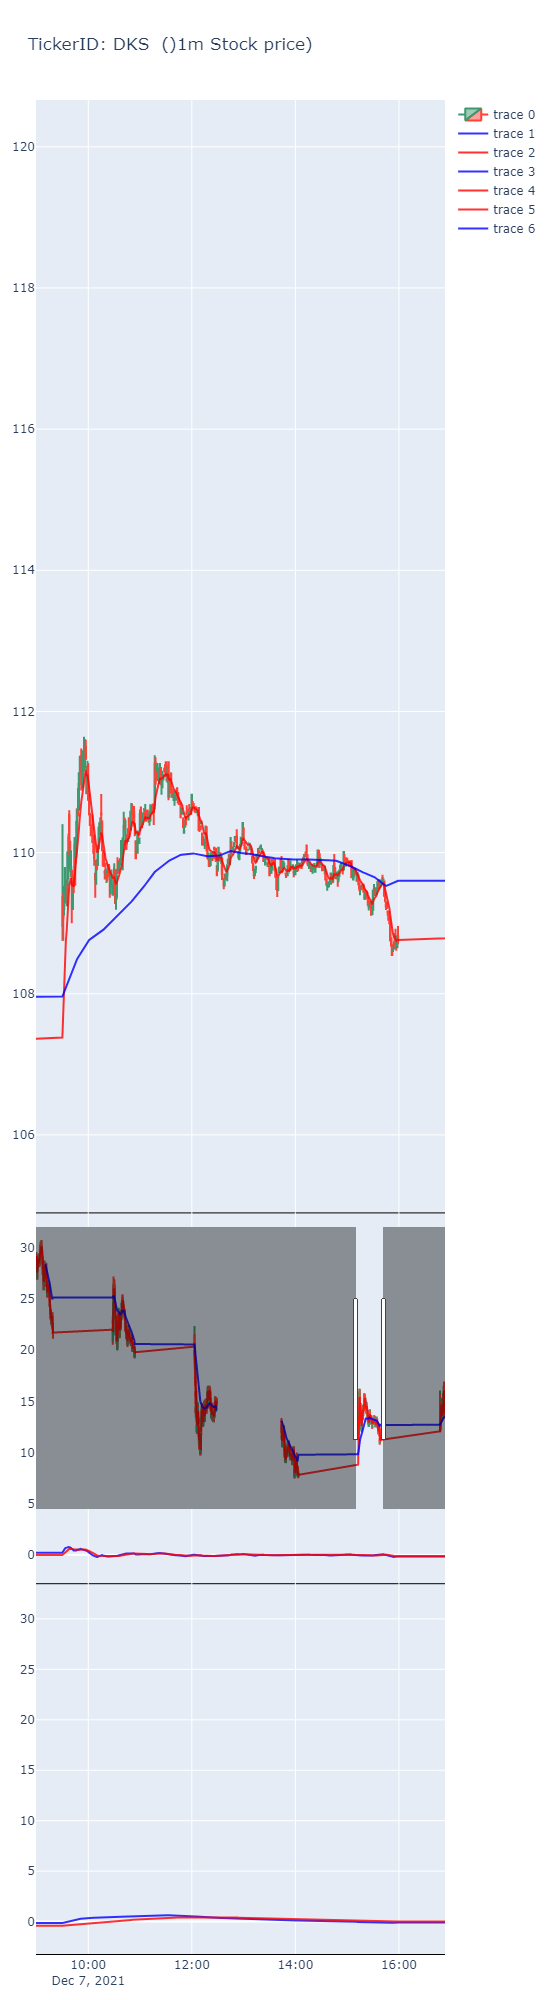

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#plot the chart
fig = make_subplots(vertical_spacing = 0, rows=3, cols=1,shared_xaxes=True,  row_heights=[0.6, 0.2, 0.2])

#Candlestick data
fig.add_trace(go.Candlestick(x=df['Datetime'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']),row=1,col=1)
#MACD data (1m)
fig.add_trace(go.Scatter(
                x=data['Datetime'],
                y=data['macd1m'],
                line_color='blue',
                opacity=0.8),row=2,col=1)

fig.add_trace(go.Scatter(
                x=data['Datetime'],
                y=data['signal1m'],
                line_color='red',
                opacity=0.8),row=2,col=1)

#MACD data (15m)
fig.add_trace(go.Scatter(
                x=data['Datetime'],
                y=data['macd15m'],
                line_color='blue',
                opacity=0.8),row=3,col=1)

fig.add_trace(go.Scatter(
                x=data['Datetime'],
                y=data['signal15m'],
                line_color='red',
                opacity=0.8),row=3,col=1)

#EMA data
fig.add_trace(go.Scatter(
                x=data2['Datetime'],
                y=data2['ema1m'],
                line_color='red',
                opacity=0.8),row=1,col=1)

fig.add_trace(go.Scatter(
                x=data2['Datetime'],
                y=data2['ema15m'],
                line_color='blue',
                opacity=0.8),row=1,col=1)

#eliminate gaps
# build complete timepline from start date to end date
dt_all = pd.date_range(start=df['Datetime'].iloc[0],end=df['Datetime'].iloc[-1])
# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime('%Y-%m-%d %H:%M:%S.%f') for d in pd.to_datetime(df['Datetime'])]
# define dates with missing values
dt_breaks = [d for d in dt_all.strftime('%Y-%m-%d %H:%M:%S.%f').tolist() if not d in dt_obs]
# hide dates with no values
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])



fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=False,showspikes = True,spikemode  = 'across+toaxis',spikesnap = 'cursor',showgrid=True)

fig.update_layout(title="TickerID: "+_ticker+"  ()"+_resolution+" Stock price)",height=2000,margin_autoexpand=True,margin=dict(l=20, r=20, t=100, b=20),hovermode  = 'x',spikedistance =  -1)

fig.show()

### Strategy execution:

In [56]:

#for MACD: 1. Only use One-TimeFrame 2. MACD > Signal = AllowLong signal
def MACD_signal(_MACD, _SIGNAL):
    memory=0
    memory = np.where(_MACD > _SIGNAL,1,-1)
    return memory

#for EMA: Short EMA Crossover Long EMA --> Long , vice versa
##def EMA_signal(_fastEMA,_slowEMA)
##    import numpy as np
##    if 


def strategy(_price_src, _signal_src):
    #portfolio setup
    stock = 0
    buy_price = 0
    sell_price = 0
    #memory Profit/Loss here:
    rets = []
    for i in range(len(_signal_src)):
        if _signal_src[i] == 1:
            # Take action after bar close
            buy_price = _price_src[_signal_src.index[i+1]]
            stock += 1
        elif _signal_src[i] == -1:
            # Take action after bar close
            sell_price = _price_src[_signal_src.index[i+1]]
            stock -= 1
            rets.append((sell_price-buy_price)/buy_price)
            # Clear up memory after all position closed
            buy_price = 0
            sell_price = 0
    #Selling, for the last day of the backtesing (already gone through the for loop run)
    if stock == 1 and buy_price != 0 and sell_price == 0:
        sell_price = _price_src[-1]
        rets.append((sell_price-buy_price)/buy_price)
    total_ret = 1
    for ret in rets:
        total_ret *= 1 + ret
    return total_ret
        
signal = MACD_signal(data['macd1m'] , data['signal1m'])        
#print out 
total_ret = strategy(df['Close'],signal)

##print(str(round((total_ret - 1)*100,2)) + '%')
import matplotlib.pyplot as plt
plt.plot(total_ret)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

### maximizing (total return) by tuning technical indicator parameters 

In [ ]:
#maximizing (total return) by tuning (period, upper, lower)

max_total_ret, max_period, max_upper, max_lower = 0, 0, 0, 0

# Hyperparameter optimization

#Learning notes: make sure there is one output in your "Backtest" function. 
#It's better to make it only one output, i.e. "total final PnL"


max_total_ret, max_period, max_upper, max_lower = 0, 0, 0, 0
for period in range(6,25):
    for upper in range(70,91):
        for lower in range(10,31):
            ret = strategy(SPY_Open,RSI_Trading_Sig(RSI(SPY_Close, period), upper, lower))
            if ret > max_total_ret:
                max_total_ret, max_period, max_upper, max_lower = ret, period, upper, lower

                
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import gridspec

x = RSI(SPY_Close, max_period).index
y = RSI(SPY_Close, max_period).values

fig = plt.figure(figsize=(15,10))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# line0 = ax0.plot(x, y, color='r')
ax0.plot(RSI(SPY_Close, max_period))
ax0.axhline(y=max_upper, color='red')
ax0.axhline(y=max_lower, color='green')



#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rsi_sig = pd.Series(index = RSI(SPY_Close, max_period).index, data = list(RSI_Trading_Sig(RSI(SPY_Close, max_period), max_upper, max_lower).values))
ax1.plot(rsi_sig)

print('Total return：' + str(round(100*(max_total_ret-1),2)) + '%')
print('Parameter：' + 'RSI lookback period: ' + str(period) + ' ,Upper bond: ' + str(max_upper) + ' ,Lower bond: ' + str(max_lower))
plt.show()